## Ex 8.1

12.991622157528097 -0.49959100950627044 2.420737176753304


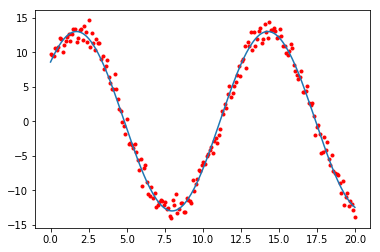

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from functools import partial

x = np.linspace(0, 20, 200)
y = 13*np.sin(0.5*x+7) + np.random.normal(size=200)

def f(A, B, C, x_value):
    return A*np.sin(B*x_value + C)

def error(paramters, x_values, y_values):
    total_error = 0
    for i in range(0, len(x_values)):
        total_error += abs(y_values[i] - f(paramters[0], paramters[1], paramters[2], x_values[i]))
    return total_error

baked_error = partial(error, x_values=x, y_values=y)
results = optimize.minimize(baked_error, [1,1,1])
print(results.x[0],results.x[1],results.x[2])

plt.plot(x, y, 'r.')
plt.plot(x, f(results.x[0],results.x[1],results.x[2],x))
plt.show()

## Ex 8.2

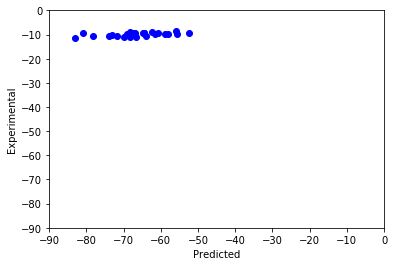

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from functools import partial

def f(a1, a2, a3, Evdw, Ecav, Eelec):
    return a1*Evdw + a2*Ecav + a3*Eelec

def error(paramters, x1_values, x2_values, x3_values, y_values):
    total_error = 0
    for i in range(0, len(x1_values)):
        total_error += abs(y_values[i] - f(paramters[0], paramters[1], paramters[2], x1_values[i], x2_values[i], x3_values[i]))
    return total_error

data = np.genfromtxt("data/4HEU.csv", skip_header=1, delimiter=",")

plt.plot(f(1, 1, 1, data[:,1], data[:,2], data[:,3]), data[:,0], 'bo')
plt.xlim(-90, 0)
plt.ylim(-90, 0)
plt.xlabel("Predicted")
plt.ylabel("Experimental")
plt.show()

0.144868187027 -0.192518334954 0.0394156185591


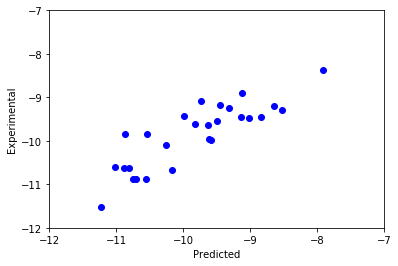

In [19]:
x1 = data[:,1]
x2 = data[:,2]
x3 = data[:,3]
y = data[:,0]
baked_error = partial(error, x1_values=x1, x2_values=x2, x3_values=x3, y_values=y)
results = optimize.minimize(baked_error, [1,1,1])
print(results.x[0],results.x[1],results.x[2])

plt.plot(f(results.x[0],results.x[1],results.x[2], data[:,1], data[:,2], data[:,3]), data[:,0], 'bo')
plt.xlim(-12, -7)
plt.ylim(-12, -7)
plt.xlabel("Predicted")
plt.ylabel("Experimental")
plt.show()

## Ex 8.3

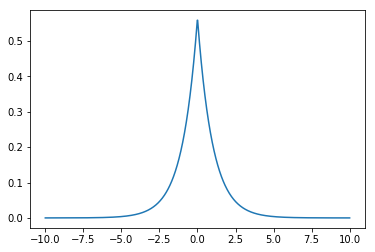

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from functools import partial

def gauss(a, c, x):
    return c*np.exp(-a*x**2)

def one_s_orbital(x):
    return 1/(np.pi)**0.5*np.exp(-abs(x))

x_data = np.linspace(-10, 10, 1000)

plt.plot(x_data, one_s_orbital(x_data))
plt.show()

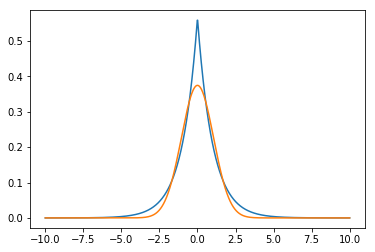

In [13]:
def error(paramters, x_values):
    total_error = 0
    for i in range(0, len(x_values)):
        total_error += abs(one_s_orbital(x_values[i])- gauss(paramters[0], paramters[1], x_values[i]))
    return total_error

baked_error = partial(error, x_values=x_data)
results = optimize.minimize(baked_error, [1,1])

plt.plot(x_data, one_s_orbital(x_data))
plt.plot(x_data, gauss(results.x[0], results.x[1], x_data))
plt.show()

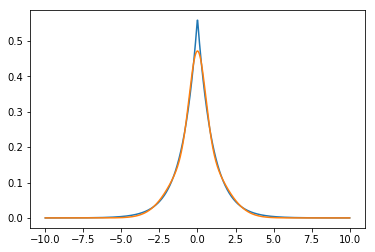

In [14]:
def error2(paramters, x_values):
    total_error = 0
    for i in range(0, len(x_values)):
        total_error += abs(one_s_orbital(x_values[i]) - gauss(paramters[0], paramters[1], x_values[i])
                                                      - gauss(paramters[2], paramters[3], x_values[i]))
    return total_error

baked_error2 = partial(error2, x_values=x_data)
results = optimize.minimize(baked_error2, [1,1, 0.5, 0.5])

plt.plot(x_data, one_s_orbital(x_data))
plt.plot(x_data, gauss(results.x[0], results.x[1], x_data)
                +gauss(results.x[2], results.x[3], x_data))
plt.show()

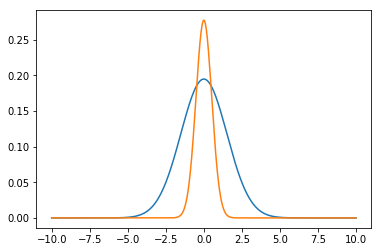

In [15]:
plt.plot(x_data, gauss(results.x[0], results.x[1], x_data))
plt.plot(x_data, gauss(results.x[2], results.x[3], x_data))
plt.show()

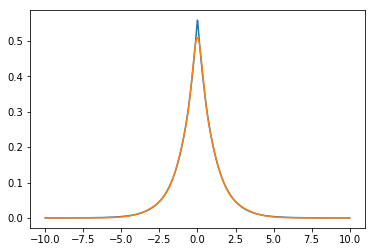

In [16]:
def error3(paramters, x_values):
    total_error = 0
    for i in range(0, len(x_values)):
        total_error += abs(one_s_orbital(x_values[i]) - gauss(paramters[0], paramters[1], x_values[i])
                                                      - gauss(paramters[2], paramters[3], x_values[i])
                                                      - gauss(paramters[4], paramters[5], x_values[i]))
    return total_error

baked_error3 = partial(error3, x_values=x_data)
results = optimize.minimize(baked_error3, [1, 1, 0.5, 0.5, 1.5, 1.5])

plt.plot(x_data, one_s_orbital(x_data))
plt.plot(x_data, gauss(results.x[0], results.x[1], x_data)
                +gauss(results.x[2], results.x[3], x_data)
                +gauss(results.x[4], results.x[5], x_data))
plt.show()

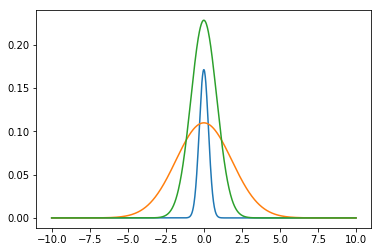

In [17]:
plt.plot(x_data, gauss(results.x[0], results.x[1], x_data))
plt.plot(x_data, gauss(results.x[2], results.x[3], x_data))
plt.plot(x_data, gauss(results.x[4], results.x[5], x_data))
plt.show()

## Ex 8.4

In [9]:
import numpy as np
from scipy import optimize
from functools import partial

def esp(charge, x_point, y_point, z_point, x_atom, y_atom, z_atom):
    r = ((x_point-x_atom)**2+(y_point-y_atom)**2+(z_point-z_atom)**2)**0.5
    return charge/r

def error(charges, x_vals, y_vals, z_vals, qm_esp):
    x_atom1 = 1.638
    y_atom1 = 1.137
    z_atom1 = 0.000
    x_atom2 = 0.000
    y_atom2 =-0.143
    z_atom2 = 0.000
    x_atom3 =-1.638 
    y_atom3 = 1.137
    z_atom3 = 0.000
    total_error = 0
    for i in range(0, len(x_vals)):
        total_error += abs(qm_esp[i] - esp(charges[0], x_vals[i], y_vals[i], z_vals[i], x_atom1, y_atom1, z_atom1)
                                     - esp(charges[1], x_vals[i], y_vals[i], z_vals[i], x_atom2, y_atom2, z_atom2)
                                     - esp(charges[2], x_vals[i], y_vals[i], z_vals[i], x_atom3, y_atom3, z_atom3))
    return total_error
        
data = np.genfromtxt("data/ESP_data.csv", skip_header=1, delimiter=",")

baked_error = partial(error, x_vals=data[:,0], y_vals=data[:,1], z_vals=data[:,2], qm_esp=data[:,3])
results = optimize.minimize(baked_error, [1,1,1])
print(results.x[0],results.x[1],results.x[2])
print(results.x[0]+results.x[1]+results.x[2])

0.211141984235 -0.419842145833 0.210883064889
0.00218290329072


In [11]:
def error(charges, x_vals, y_vals, z_vals, qm_esp):
    x_atom1 = 1.638
    y_atom1 = 1.137
    z_atom1 = 0.000
    x_atom2 = 0.000
    y_atom2 =-0.143
    z_atom2 = 0.000
    x_atom3 =-1.638 
    y_atom3 = 1.137
    z_atom3 = 0.000
    total_error = 0
    for i in range(0, len(x_vals)):
        total_error += abs(qm_esp[i] - esp(charges[0], x_vals[i], y_vals[i], z_vals[i], x_atom1, y_atom1, z_atom1)
                                     - esp(charges[1], x_vals[i], y_vals[i], z_vals[i], x_atom2, y_atom2, z_atom2)
                                     - esp(0-charges[0]-charges[1], x_vals[i], y_vals[i], z_vals[i], x_atom3, y_atom3, z_atom3))
    return total_error

baked_error2 = partial(error, x_vals=data[:,0], y_vals=data[:,1], z_vals=data[:,2], qm_esp=data[:,3])
results = optimize.minimize(baked_error2, [1,1])
print(results.x[0],results.x[1])
print(0-results.x[0]-results.x[1])

0.213782772627 -0.428020880847
0.21423810822
